In [ ]:
### Ensemble 10
### Including prokaryotes and trying different parameter combinations of µ0, m_l, m_q, kldoc_p, phi and ligphi
### Duration: 10000 years
### beta = 1E12
### 324 runs

In [1]:
### Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl
from matplotlib.colors import ListedColormap
plt.rcParams['text.usetex'] = True

# Enable the use of LaTeX for rendering text labels
mpl.rcParams['text.usetex'] = True

# Set the font family to sans-serif (Helvetica, Arial, etc.)
mpl.rcParams['font.family'] = 'sans-serif'

# Set the font style for the labels (optional)
mpl.rcParams['font.style'] = 'normal'

# Add a LaTeX preamble to change font family for numbers to sans-serif
mpl.rcParams['text.latex.preamble'] = r'\usepackage{sfmath}'


os.getcwd()


'c:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensemble10'

# Data import and first inspection

In [2]:
data = pd.read_csv('Ensemble10.csv', sep=' ')

In [3]:
data.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
0,45000.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2099.182739,2353.981487,2398.924694,2388.222287,2399.576162,284.654636,264.283178,631.709210,0.0,323.0
1,45001.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2098.685234,2355.760238,2398.704347,2387.878202,2399.316648,284.905485,263.970330,644.497397,0.0,323.0
2,45002.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2111.013894,2368.406678,2391.467404,2387.840269,2399.316106,272.375200,282.105763,730.726219,0.0,324.0
3,45003.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2101.910411,2345.420526,2400.428237,2390.566542,2401.061231,283.807297,265.484486,572.952489,0.0,323.0
4,45004.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2100.002411,2352.367477,2399.307532,2389.069126,2399.920103,284.545094,264.482750,619.701593,0.0,323.0


In [4]:
data.shape

(324, 45)

In [5]:
### Add column

data['fe_lim_p(1)'] = (data['Fe(1)'] / (data['Fe(1)'] + data['kfe_p'] * 1e6)) / (data['LDOC(1)'] / (data['LDOC(1)'] + data['kldoc_p'] * 1e3)) < 1
data['fe_lim_p(2)'] = (data['Fe(2)'] / (data['Fe(2)'] + data['kfe_p'] * 1e6)) / (data['LDOC(2)'] / (data['LDOC(2)'] + data['kldoc_p'] * 1e3)) < 1
data['fe_lim_p(3)'] = (data['Fe(3)'] / (data['Fe(3)'] + data['kfe_p'] * 1e6)) / (data['LDOC(3)'] / (data['LDOC(3)'] + data['kldoc_p'] * 1e3)) < 1

In [6]:
data.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit,fe_lim_p(1),fe_lim_p(2),fe_lim_p(3)
0,45000.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2388.222287,2399.576162,284.654636,264.283178,631.709210,0.0,323.0,True,True,True
1,45001.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2387.878202,2399.316648,284.905485,263.970330,644.497397,0.0,323.0,True,True,True
2,45002.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2387.840269,2399.316106,272.375200,282.105763,730.726219,0.0,324.0,True,False,False
3,45003.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2390.566542,2401.061231,283.807297,265.484486,572.952489,0.0,323.0,True,True,True
4,45004.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2389.069126,2399.920103,284.545094,264.482750,619.701593,0.0,323.0,True,True,True


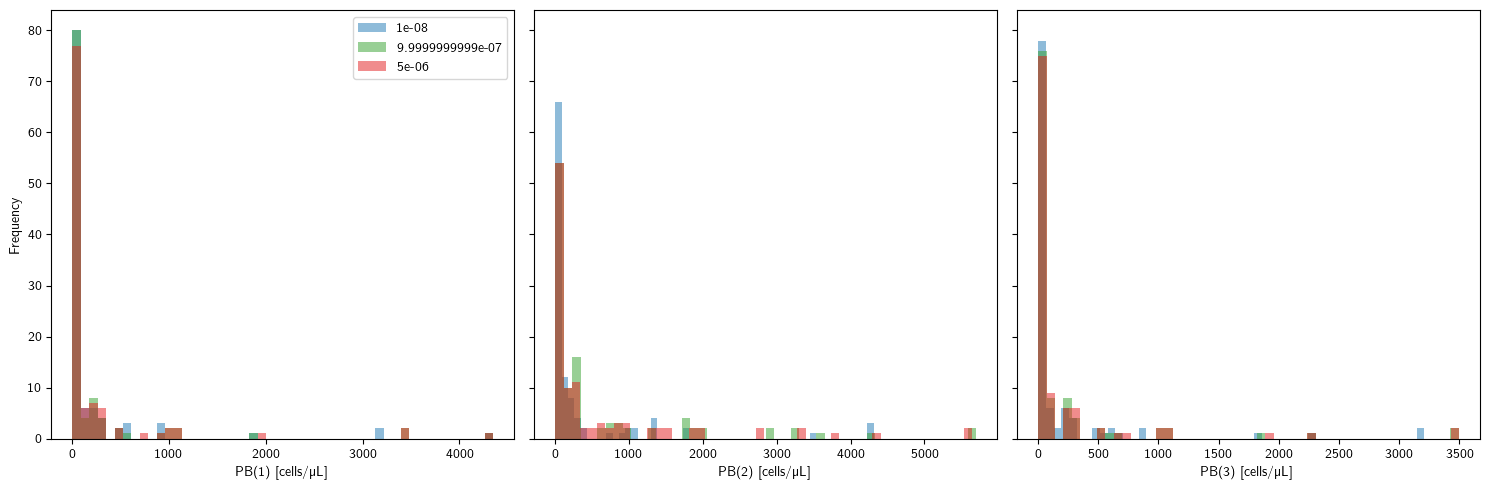

In [7]:
### Plot histograms of the ouput variables: PB(1), PB(2), PB(3)
### Put into 3 plots in one subplot

# custom_cmap = ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'])
colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a']
ligphi_unique = data['ligphi'].unique()

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, tight_layout=True)
for i in range(len(ligphi_unique)):
    subset_data = data[data['ligphi'] == ligphi_unique[i]]

    axs[0].hist(subset_data['PB(1)'], bins=50, color=colors[i], alpha=0.5, label=ligphi_unique[i])
    axs[1].hist(subset_data['PB(2)'], bins=50, color=colors[i], alpha=0.5, label=ligphi_unique[i])
    axs[2].hist(subset_data['PB(3)'], bins=50, color=colors[i], alpha=0.5, label=ligphi_unique[i])


axs[0].set_xlabel('PB(1) [cells/µL]')
axs[1].set_xlabel('PB(2) [cells/µL]')
axs[2].set_xlabel('PB(3) [cells/µL]')
axs[0].set_ylabel('Frequency')
axs[0].legend()




Text(0.5, 0, 'Lig(3) [nmol/L]')

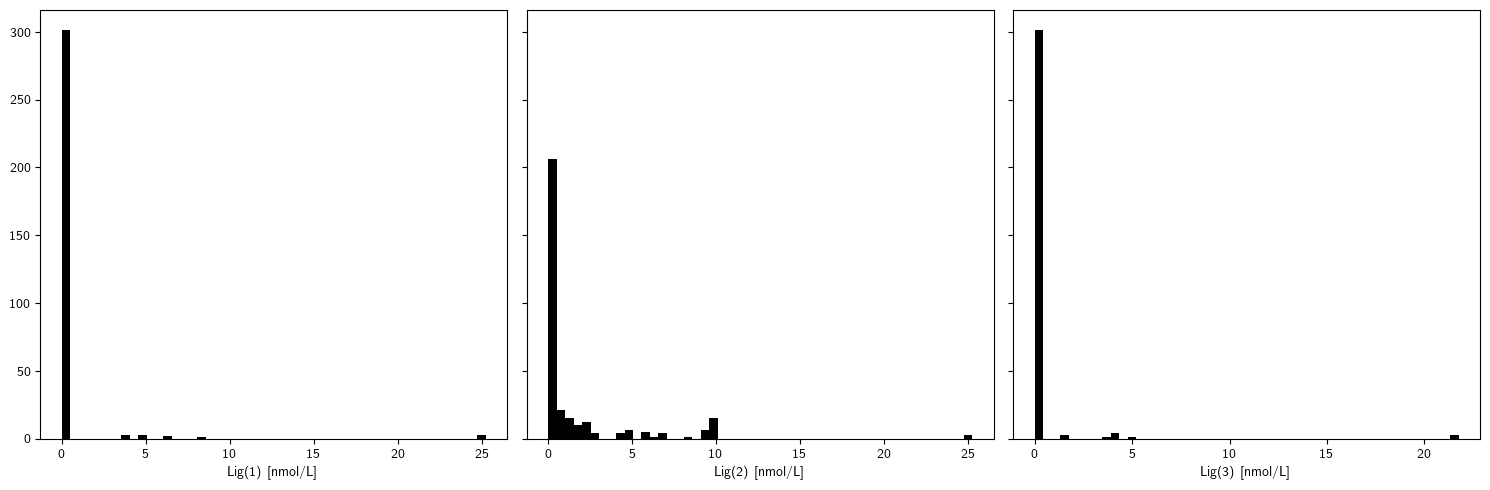

In [8]:
### Plot histograms of the ouput variables: Lig(1), Lig(2), Lig(3)
### Put into 3 plots in one subplot

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, tight_layout=True)
axs[0].hist(data['Lig(1)'], bins=50, color='black')
axs[0].set_xlabel('Lig(1) [nmol/L]')

axs[1].hist(data['Lig(2)'], bins=50, color='black')
axs[1].set_xlabel('Lig(2) [nmol/L]')

axs[2].hist(data['Lig(3)'], bins=50, color='black')
axs[2].set_xlabel('Lig(3) [nmol/L]')



Text(0.5, 0, 'Fe(3) [nmol/L]')

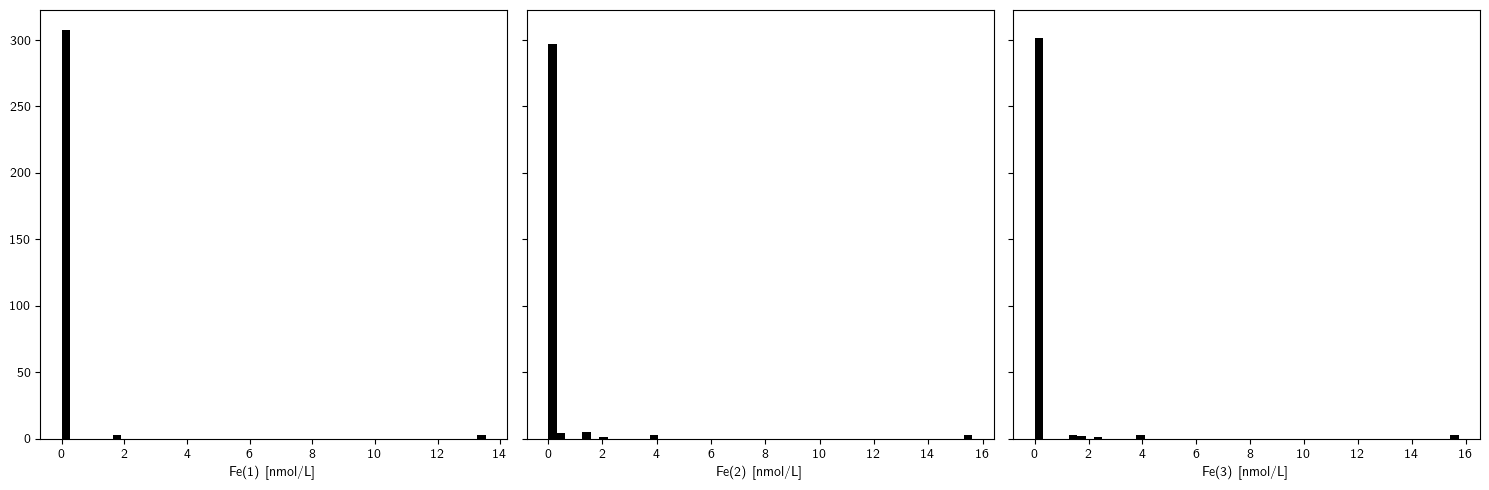

In [9]:
### Plot histograms of the ouput variables: Fe(1), Fe(2), Fe(3)
### Put into 3 plots in one subplot

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, tight_layout=True)
axs[0].hist(data['Fe(1)'], bins=50, color='black')
axs[0].set_xlabel('Fe(1) [nmol/L]')

axs[1].hist(data['Fe(2)'], bins=50, color='black')
axs[1].set_xlabel('Fe(2) [nmol/L]')

axs[2].hist(data['Fe(3)'], bins=50, color='black')
axs[2].set_xlabel('Fe(3) [nmol/L]')





In [10]:
### create a pandas dataframe where the the different rows are sorted by Fe(3) value, highest to lowest
### only columns of interest are Fe(1), Fe(2), Fe(3), PB(1), PB(2) PB(3), Lig(1), Lig(2), Lig(3), LDOC(1), LDOC(2), LDOC(3), mu0, m_l, m_q, kldoc_p, phi, ligphi, fe_lim_p(1), fe_lim_p(2), fe_lim_p(3)
### only select those columns from the original dataframe
### View the top 15 rows
### show all columns
pd.set_option('display.max_columns', None)

data_sorted = data.sort_values(by=['Fe(3)'], ascending=False)
data_sorted = data_sorted[['Fe(1)', 'Fe(2)', 'Fe(3)', 'PB(1)', 'PB(2)', 'PB(3)', 'Lig(1)', 'Lig(2)', 'Lig(3)', 'LDOC(1)', 'LDOC(2)', 'LDOC(3)', 'mu0', 'm_l', 'm_q', 'kldoc_p', 'phi', 'ligphi', 'fe_lim_p(1)', 'fe_lim_p(2)', 'fe_lim_p(3)']]
data_sorted.head(15)




,Fe(1),Fe(2),Fe(3),PB(1),PB(2),PB(3),Lig(1),Lig(2),Lig(3),LDOC(1),LDOC(2),LDOC(3),mu0,m_l,m_q,kldoc_p,phi,ligphi,fe_lim_p(1),fe_lim_p(2),fe_lim_p(3)
11,13.543447,15.619577,15.735152,0.000000e+00,0.000000e+00,0.000000e+00,25.201301,25.218909,21.731064,1.084050,1.084085,1.077110,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,False,False,False
29,13.534161,15.610289,15.725957,0.000000e+00,0.000000e+00,0.000000e+00,25.234820,25.252428,21.764438,1.074444,1.074479,1.067503,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,False,False,False
47,13.534109,15.610237,15.725906,0.000000e+00,0.000000e+00,0.000000e+00,25.235178,25.252787,21.764795,1.074344,1.074379,1.067403,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,False,False,False
46,1.849933,3.945850,4.034649,3.000000e-17,3.000000e-17,3.000000e-17,4.738098,4.741619,4.044155,1.118847,1.118882,1.111907,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,1.000000e-06,False,False,False
28,1.849613,3.945531,4.034329,3.000000e-17,3.000000e-17,3.000000e-17,4.737778,4.741298,4.043835,1.118864,1.118899,1.111924,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,1.000000e-06,False,False,False
10,1.829553,3.925472,4.014252,2.410000e-15,2.490000e-15,2.380000e-15,4.717646,4.721167,4.023708,1.120648,1.120684,1.113709,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,1.000000e-06,False,False,False
173,0.011124,2.080870,2.205798,0.000000e+00,0.000000e+00,0.000000e+00,8.268756,8.399997,4.794235,0.102963,0.103225,0.096014,1.157407e-06,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,False,False,False
191,0.008055,1.517676,1.640347,0.000000e+00,1.000000e-17,0.000000e+00,6.501219,9.291376,3.925243,0.098522,0.104102,0.093370,1.157407e-06,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,True,False,False
209,0.008025,1.512009,1.634656,0.000000e+00,1.000000e-17,0.000000e+00,6.481908,9.298827,3.914976,0.098487,0.104120,0.093353,1.157407e-06,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,True,False,False
38,0.007603,1.477750,1.554396,2.488776e-03,5.194387e-03,7.037239e-03,4.032020,6.940994,1.555894,0.116515,0.122599,0.111563,1.157407e-07,1.157407e-08,0.0,0.001025,0.00001,5.000000e-06,True,False,False


In [ ]:
# The highest Fe concentrations in the deep ocean all lead to very low PB concentrations in general
# Conditions where ligand concentrations are reasonable: Indices 46, 28, 10
# All have mu0 = 1.157E-7 s-1 = 0.01 d-1, phi=1E-5, ligphi=1E-6
1.157e-7 * (86400)

0.00999648

In [11]:
### select all rows where PB(3) > 1 and PB(2) > 100

data_sorted_pb = data[(data['PB(3)'] > 1) & (data['PB(2)'] > 100)].sort_values(by=['PB(2)'], ascending=True)
data_sorted_pb = data_sorted_pb[['Fe(1)', 'Fe(2)', 'Fe(3)', 'PB(1)', 'PB(2)', 'PB(3)', 'Lig(1)', 'Lig(2)', 'Lig(3)', 'LDOC(1)', 'LDOC(2)', 'LDOC(3)', 'mu0', 'm_l', 'm_q', 'kldoc_p', 'phi', 'ligphi', 'fe_lim_p(1)', 'fe_lim_p(2)', 'fe_lim_p(3)']]
data_sorted_pb.head(50)



,Fe(1),Fe(2),Fe(3),PB(1),PB(2),PB(3),Lig(1),Lig(2),Lig(3),LDOC(1),LDOC(2),LDOC(3),mu0,m_l,m_q,kldoc_p,phi,ligphi,fe_lim_p(1),fe_lim_p(2),fe_lim_p(3)
102,0.000037,0.003305,0.000999,99.829366,114.995976,101.751127,1.007946e-03,0.015864,9.838033e-04,4.528929,6.474426,4.525502e+00,1.157407e-07,1.157407e-10,0.0,0.010245,0.00100,1.000000e-08,True,True,True
93,0.000037,0.003305,0.000999,99.837868,115.005802,101.759784,1.007941e-03,0.015864,9.837989e-04,4.529304,6.474796,4.525877e+00,1.157407e-07,1.157407e-10,0.0,0.001025,0.00100,1.000000e-08,True,True,True
138,0.000036,0.003305,0.000930,106.065621,121.777356,107.929250,9.379531e-04,0.015402,9.141548e-04,4.255894,6.197579,4.252601e+00,1.157407e-07,1.157400e-12,0.0,0.010245,0.00100,1.000000e-08,True,True,True
129,0.000036,0.003305,0.000930,106.069803,121.781852,107.933577,9.379892e-04,0.015402,9.141908e-04,4.256356,6.198040,4.253063e+00,1.157407e-07,1.157400e-12,0.0,0.001025,0.00100,1.000000e-08,True,True,True
94,0.000037,0.003305,0.000994,111.027353,127.937264,113.153667,3.230046e-03,0.921933,9.786916e-04,0.078566,2.018121,7.446245e-02,1.157407e-07,1.157407e-10,0.0,0.001025,0.00100,1.000000e-06,True,True,True
103,0.000037,0.003305,0.000994,111.027353,127.937264,113.153667,3.230046e-03,0.921933,9.786916e-04,0.078566,2.018121,7.446245e-02,1.157407e-07,1.157407e-10,0.0,0.010245,0.00100,1.000000e-06,True,True,True
95,0.000037,0.003305,0.000994,111.027365,127.937279,113.153676,9.854331e-03,4.532212,9.785859e-04,0.019190,1.958745,1.508603e-02,1.157407e-07,1.157407e-10,0.0,0.001025,0.00100,5.000000e-06,True,True,True
104,0.000037,0.003305,0.000994,111.027365,127.937279,113.153676,9.854331e-03,4.532212,9.785859e-04,0.019190,1.958745,1.508603e-02,1.157407e-07,1.157407e-10,0.0,0.010245,0.00100,5.000000e-06,True,True,True
139,0.000037,0.003305,0.000984,112.284310,128.436913,114.369736,3.211279e-03,0.919899,9.680063e-04,0.077837,2.017797,7.377240e-02,1.157407e-07,1.157400e-12,0.0,0.010245,0.00100,1.000000e-06,True,True,True
130,0.000037,0.003305,0.000984,112.284310,128.436913,114.369736,3.211279e-03,0.919899,9.680063e-04,0.077837,2.017797,7.377240e-02,1.157407e-07,1.157400e-12,0.0,0.001025,0.00100,1.000000e-06,True,True,True


## Trying to build statistidal models
Does not work!!!

In [32]:
data['phi_over_ligphi'] = data['phi'] / data['ligphi']

                                 OLS Regression Results                                
Dep. Variable:                  Fe(2)   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              683.3
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                   4.94e-168
Time:                        18:11:36   Log-Likelihood:                         -309.90
No. Observations:                 324   AIC:                                      629.8
Df Residuals:                     319   BIC:                                      648.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

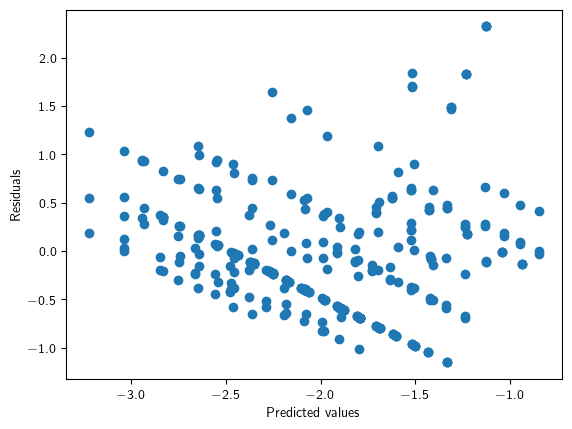

In [65]:
import statsmodels.api as sm

X = np.log10(data[['mu0', 'm_l', 'kldoc_p', 'phi', 'ligphi']])
if np.any(np.isinf(X)) or np.any(np.isnan(X)):
    # Handle missing or infinite values (replace with a suitable method, e.g., imputation)
    X = np.nan_to_num(X, nan=np.nanmean(X))

y = np.log10(data[['Fe(2)']])

# Impute NaN values in the target variable
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y)
y_imputed_df = pd.DataFrame(y_imputed, columns=y.columns)
# Add a constant to the features matrix (required for statsmodels)
X_with_constant = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y_imputed_df, X).fit()

# Display summary statistics
print(model.summary())

### Plot the residuals

# Get the residuals
residuals = model.resid

# Plot the residuals
plt.scatter(model.predict(X), residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

### Save the coefficients to a vector

coefficients_fe2 = model.params

In [66]:
import statsmodels.api as sm

X = np.log10(data[['mu0', 'm_l', 'kldoc_p', 'phi', 'ligphi']])
if np.any(np.isinf(X)) or np.any(np.isnan(X)):
    # Handle missing or infinite values (replace with a suitable method, e.g., imputation)
    X = np.nan_to_num(X, nan=np.nanmean(X))

y = np.log10(data[['Fe(3)']])

# Impute NaN values in the target variable
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y)
y_imputed_df = pd.DataFrame(y_imputed, columns=y.columns)
# Add a constant to the features matrix (required for statsmodels)
X_with_constant = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y_imputed_df, X).fit()

# Display summary statistics
print(model.summary())

coefficients_fe3 = model.params

                                 OLS Regression Results                                
Dep. Variable:                  Fe(3)   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              689.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                   1.29e-168
Time:                        18:11:37   Log-Likelihood:                         -401.01
No. Observations:                 324   AIC:                                      812.0
Df Residuals:                     319   BIC:                                      830.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [67]:
import statsmodels.api as sm

X = np.log10(data[['mu0', 'm_l', 'kldoc_p', 'phi', 'ligphi']])
if np.any(np.isinf(X)) or np.any(np.isnan(X)):
    # Handle missing or infinite values (replace with a suitable method, e.g., imputation)
    X = np.nan_to_num(X, nan=np.nanmean(X))

y = np.log10(data[['Lig(2)']])

# Impute NaN values in the target variable
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y)
y_imputed_df = pd.DataFrame(y_imputed, columns=y.columns)
# Add a constant to the features matrix (required for statsmodels)
X_with_constant = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y_imputed_df, X).fit()

# Display summary statistics
print(model.summary())

coefficients_lig2 = model.params

                                 OLS Regression Results                                
Dep. Variable:                 Lig(2)   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              182.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                    2.47e-91
Time:                        18:11:38   Log-Likelihood:                         -419.99
No. Observations:                 324   AIC:                                      850.0
Df Residuals:                     319   BIC:                                      868.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [68]:
import statsmodels.api as sm

X = np.log10(data[['mu0', 'm_l', 'kldoc_p', 'phi', 'ligphi']])
if np.any(np.isinf(X)) or np.any(np.isnan(X)):
    # Handle missing or infinite values (replace with a suitable method, e.g., imputation)
    X = np.nan_to_num(X, nan=np.nanmean(X))

y = np.log10(data[['Lig(3)']])

# Impute NaN values in the target variable
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y)
y_imputed_df = pd.DataFrame(y_imputed, columns=y.columns)
# Add a constant to the features matrix (required for statsmodels)
X_with_constant = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y_imputed_df, X).fit()

# Display summary statistics
print(model.summary())

coefficients_lig3 = model.params

                                 OLS Regression Results                                
Dep. Variable:                 Lig(3)   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              457.3
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                   4.24e-143
Time:                        18:11:38   Log-Likelihood:                         -489.12
No. Observations:                 324   AIC:                                      988.2
Df Residuals:                     319   BIC:                                      1007.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [69]:
import statsmodels.api as sm

data_sub = data[data['PB(2)'] > 0]

X = np.log10(data_sub[['mu0', 'm_l', 'kldoc_p', 'phi', 'ligphi']])
if np.any(np.isinf(X)) or np.any(np.isnan(X)):
    # Handle missing or infinite values (replace with a suitable method, e.g., imputation)
    X = np.nan_to_num(X, nan=np.nanmean(X))

y = np.log10(data_sub[['PB(2)']])

# Impute NaN values in the target variable
# imputer = SimpleImputer(strategy='mean')
# y_imputed = imputer.fit_transform(y)
# y_imputed_df = pd.DataFrame(y_imputed, columns=y.columns)
# Add a constant to the features matrix (required for statsmodels)
X_with_constant = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Display summary statistics
print(model.summary())

coefficients_pb2 = model.params

                                 OLS Regression Results                                
Dep. Variable:                  PB(2)   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.516
Method:                 Least Squares   F-statistic:                              65.47
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                    6.37e-46
Time:                        18:11:39   Log-Likelihood:                         -651.75
No. Observations:                 302   AIC:                                      1313.
Df Residuals:                     297   BIC:                                      1332.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [70]:
import statsmodels.api as sm

data_sub = data[data['PB(3)'] > 0]

X = np.log10(data_sub[['mu0', 'm_l', 'kldoc_p', 'phi', 'ligphi']])
if np.any(np.isinf(X)) or np.any(np.isnan(X)):
    # Handle missing or infinite values (replace with a suitable method, e.g., imputation)
    X = np.nan_to_num(X, nan=np.nanmean(X))

y = np.log10(data_sub[['PB(3)']])

# Impute NaN values in the target variable
# imputer = SimpleImputer(strategy='mean')
# y_imputed = imputer.fit_transform(y)
# y_imputed_df = pd.DataFrame(y_imputed, columns=y.columns)
# Add a constant to the features matrix (required for statsmodels)
X_with_constant = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Display summary statistics
print(model.summary())

coefficients_pb3 = model.params

                                 OLS Regression Results                                
Dep. Variable:                  PB(3)   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.513
Method:                 Least Squares   F-statistic:                              64.23
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                    3.44e-45
Time:                        18:11:39   Log-Likelihood:                         -567.16
No. Observations:                 300   AIC:                                      1144.
Df Residuals:                     295   BIC:                                      1163.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Prediction by solving linear system of equations

In [71]:
A = np.array([coefficients_fe2, coefficients_fe3, coefficients_lig2, coefficients_lig3, coefficients_pb2, coefficients_pb3])

In [79]:
B = np.array([np.log10(1), np.log10(1), np.log10(2), np.log10(2), np.log10(200), np.log10(50)])

In [80]:
# Solve the least squares problem
X, residuals, rank, s = np.linalg.lstsq(A, B, rcond=None)

# X now contains the solution to the least squares problem
print("Solution vector X:")
print(X)

Solution vector X:
[ 9.99909541 10.82546939 -4.13964128  3.46070584  9.30576945]
